# U.S. Medical Insurance Costs

Import Numpy and Pandas

In [55]:
import pandas as pd
import numpy as np


SyntaxError: invalid syntax (<ipython-input-55-b54b1cdd03bd>, line 3)

In [9]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


To install seaborn we use the pip which is the python package manager.

In [10]:
%%capture
! pip install seaborn

Import visualization packages "Matplotlib" and "Seaborn", don't forget about "%matplotlib inline" to plot in a Jupyter notebook.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [12]:
print(df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


Question #1:
What are the minimum and maximum age of the medical insurance customers?

In [19]:
print('Minimum Age in dataset: {}'.format(min(df.age)))
print('Maximum Age in dataset: {}'.format(max(df.age)))

Minimum Age in dataset: 18
Maximum Age in dataset: 64


What are the average number of children per client in the dataset?

In [17]:
avg_children = df['children'].astype('float').mean(axis=0)
print("Average number of children per client:", avg_children)

Average number of children per client: 1.0949177877429


What does the distribution of number of children per client look like?

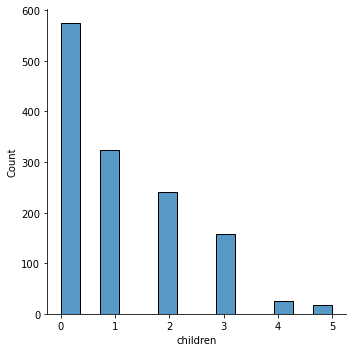

In [46]:
sns.displot(data=df, x="children", kde=False)

How much more does a smoker cost in charges than a non-smoker in the dataset?

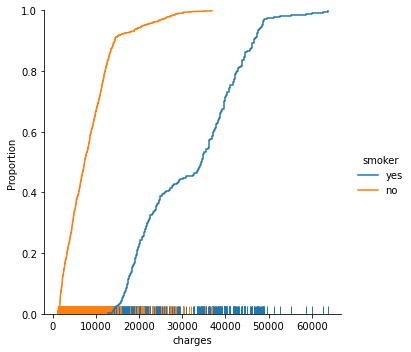

In [47]:
#"ecdf" in seaborn indicates an empirical cumulative distribution function
sns.displot(data=df, kind="ecdf", x="charges", hue="smoker", rug=True)

What are the average charges by client, given average ages in 10 year bins?

In [68]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
groups = df.groupby(pd.cut(df.age, bins))
print(groups.mean().charges)

age
(18.0, 23.111]       9492.039502
(23.111, 28.222]     9574.819173
(28.222, 33.333]    10986.589519
(33.333, 38.444]    12244.518446
(38.444, 43.556]    13126.485408
(43.556, 48.667]    15458.203729
(48.667, 53.778]    15681.948072
(53.778, 58.889]    16112.831413
(58.889, 64.0]      20824.972901
Name: charges, dtype: float64


What is the distribution of charges by ages and smoking status for all clients?

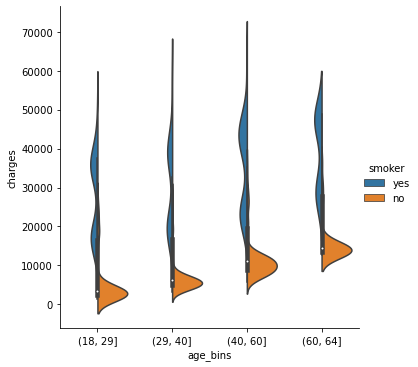

In [75]:
#from the minimum and maximum ages question, allocate the clients to bins by likely insurance actuarial interest
df['age_bins'] = pd.cut(x=df['age'], bins=[18, 29, 40, 60, 64])
#use a seaborn categorical violin plot to demonstrate the distribution
sns.catplot(data=df, kind="violin", x= 'age_bins', y="charges", hue="smoker", split=True)

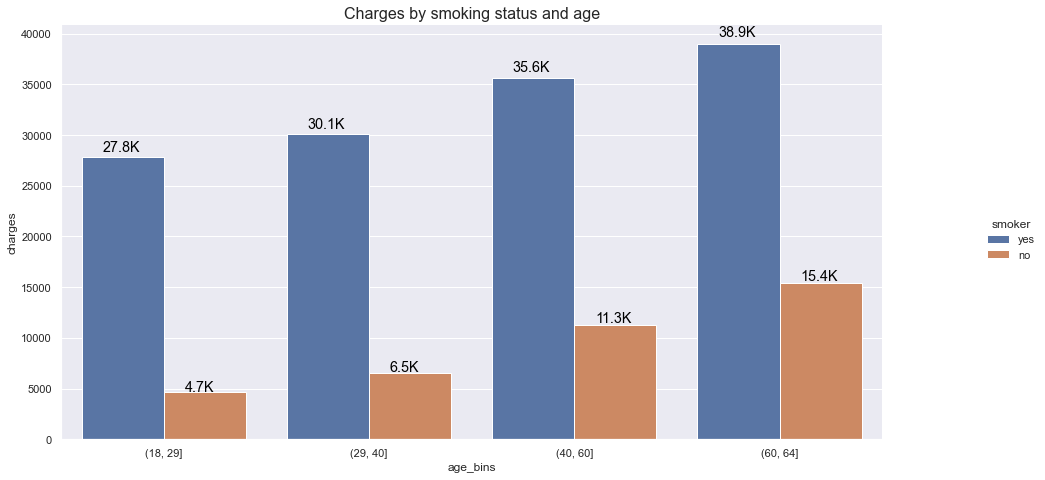

In [96]:
import matplotlib.pyplot as plt
df['age_bins'] = pd.cut(x=df['age'], bins=[18, 29, 40, 60, 64])
#try looking at this in a bar graph
g = sns.catplot(data=df, kind="bar", x="age_bins", y="charges", hue="smoker", ci=None)
plt.title('Charges by smoking status and age', fontsize = 16)
g.fig.set_size_inches(16,8)
g.fig.subplots_adjust(top=0.81,right=0.86) 
#values
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.1, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='large')

Now that I have completed the exploratory analysis of the data in the set, the project is asking me to conduct analysis with functions and classes. So... I will show why this is very lame.
Let's ask, what is the average age of the clients in our dataset?

In [107]:
import csv
ages = []
def update_list (lst, file, column_name):
    with open(file) as file_dataset: 
        csv_dict = csv.DictReader(file_dataset)
        for row in csv_dict:
            lst.append(row[column_name])
update_list(ages, 'insurance.csv', 'age')
class PatientInfo:
    def __init__ (self, patient_ages):
        self.patient_ages = patient_ages
    def analyze_ages(self):
        total_ages = 0
        for age in self.patient_ages: 
            total_ages += int(age)
        average_ages = round(total_ages / len(self.patient_ages))
        return('The Average Patient Age is: {average} years old'.format(average = average_ages))
    
patient_info = PatientInfo(ages)
patient_info.analyze_ages()

'The Average Patient Age is: 39 years old'

Using NumPy, this makes a lot more sense. (and look at how short the code snippet is) What is the average age of the clients in our dataset?

In [106]:
av_age = np.mean(df.age)
print("The Average Patient Age is: " + str(int(av_age)) + " years old.")

The Average Patient Age is: 39 years old.


In conclusion, we know that there are a lot more insurance charges for smokers than for non-smokers. On the high end of insurance charges, using the empirical cumulative distribution function, we can see that a small subset of both smokers and non-smokers have very high values. Controlling the insurance rates for all clients may mean that the insurance company should be providing preventative services for the subset accruing the most charges.
On average, the clients have one child. 
Charges increase as a function of client age.
Classes and functions for data analysis are a real bummer. 